Converged in 5 iterations.
Root: x = 0.9624569592645377, y = 1.6794636672288532


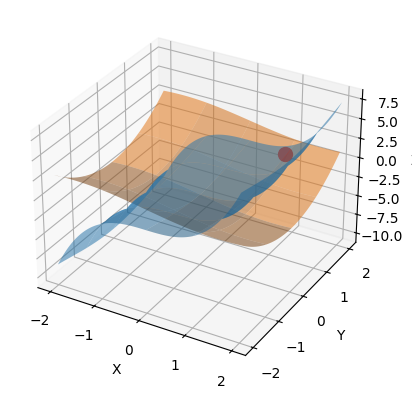

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f1(x, y):
    return x**3 - np.cos(y) - 1

def f2(y, x):
    return y**2 - np.sin(x) - 2

def jacobian(x, y):
    df1_dx = 3*x**2
    df1_dy = np.sin(y)
    df2_dx = -np.cos(x)
    df2_dy = 2*y
    return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])

def newton_raphson_2d(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    for i in range(max_iter):
        J = jacobian(x, y)
        F = np.array([f1(x, y), f2(y, x)])
        delta = np.linalg.solve(J, -F)
        x, y = x + delta[0], y + delta[1]
        if np.linalg.norm(delta) < tol:
            print(f"Converged in {i+1} iterations.")
            return x, y
    raise ValueError("Did not converge")

# Initial guess
x0, y0 = 1, 1

# Find the root
root_x, root_y = newton_raphson_2d(x0, y0)
print(f"Root: x = {root_x}, y = {root_y}")

# Plotting the 3D graph
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(Y, X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100)
ax.scatter(root_x, root_y, 0, color='r', s=100)  # Plot the root
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Converged in 5 iterations.
Root: x = 0.9624569592645377, y = 1.6794636672288532


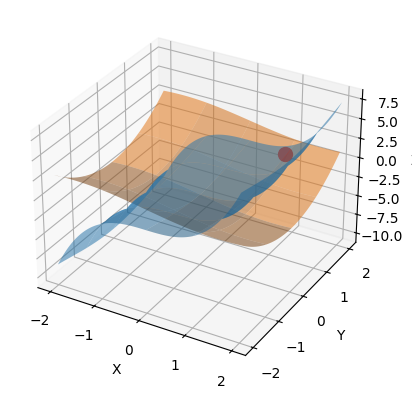

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f1(x, y):
    return x**3 - np.cos(y) - 1

def f2(y, x):
    return y**2 - np.sin(x) - 2

def jacobian(x, y):
    df1_dx = 3*x**2
    df1_dy = np.sin(y)
    df2_dx = -np.cos(x)
    df2_dy = 2*y
    return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])

def gaussian_elimination(A, b):
    n = len(b)
    # Forward elimination
    for i in range(n):
        # Pivoting
        max_row = i + np.argmax(np.abs(A[i:, i]))
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]
        # Eliminate
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

def newton_raphson_2d(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    for i in range(max_iter):
        J = jacobian(x, y)
        F = np.array([f1(x, y), f2(y, x)])
        delta = gaussian_elimination(J, -F)
        x, y = x + delta[0], y + delta[1]
        if np.linalg.norm(delta) < tol:
            print(f"Converged in {i+1} iterations.")
            return x, y
    raise ValueError("Did not converge")

# Initial guess
x0, y0 = 1, 1

# Find the root
root_x, root_y = newton_raphson_2d(x0, y0)
print(f"Root: x = {root_x}, y = {root_y}")

# Plotting the 3D graph
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(Y, X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100)
ax.scatter(root_x, root_y, 0, color='r', s=100)  # Plot the root
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Converged in 5 iterations.
Root: x = 0.9624569592645377, y = 1.6794636672288532


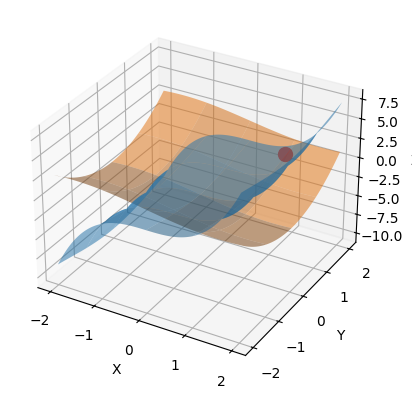

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
from sympy import symbols, diff, cos, sin

# Define the symbols
x, y = symbols('x y')

# Define the functions
f1_sym = x**3 - cos(y) - 1
f2_sym = y**2 - sin(x) - 2

# Compute the Jacobian matrix using sympy
df1_dx = diff(f1_sym, x)
df1_dy = diff(f1_sym, y)
df2_dx = diff(f2_sym, x)
df2_dy = diff(f2_sym, y)

def f1(x, y):
    return x**3 - np.cos(y) - 1

def f2(y, x):
    return y**2 - np.sin(x) - 2

def jacobian(x_val, y_val):
    df1_dx_val = df1_dx.evalf(subs={x: x_val, y: y_val})
    df1_dy_val = df1_dy.evalf(subs={x: x_val, y: y_val})
    df2_dx_val = df2_dx.evalf(subs={x: x_val, y: y_val})
    df2_dy_val = df2_dy.evalf(subs={x: x_val, y: y_val})
    return np.array([[df1_dx_val, df1_dy_val], [df2_dx_val, df2_dy_val]], dtype=float)

def newton_raphson_2d(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    for i in range(max_iter):
        J = jacobian(x, y)
        F = np.array([f1(x, y), f2(y, x)])
        delta = np.linalg.solve(J, -F)
        x, y = x + delta[0], y + delta[1]
        if np.linalg.norm(delta) < tol:
            print(f"Converged in {i+1} iterations.")
            return x, y
    raise ValueError("Did not converge")

# Initial guess
x0, y0 = 1, 1

# Find the root
root_x, root_y = newton_raphson_2d(x0, y0)
print(f"Root: x = {root_x}, y = {root_y}")

# Plotting the 3D graph
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(Y, X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100)
ax.scatter(root_x, root_y, 0, color='r', s=100)  # Plot the root
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()